# Housing Prices in Mumbai Estimator

## Hitaansh Shah - 21d180016
## Ojas Karanjkar - 210070040
## Omkar Nitsure - 210070057

In [12]:
import numpy as np                      # Importing Essential libraries

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import scipy

import statistics as st

import sklearn

## Reading csv file into a DataFrame

In [13]:
url = "https://raw.githubusercontent.com/omkarnitsureiitb/DS203-PROJECT/main/house-price-mumbai.csv?token=GHSAT0AAAAAABZU3S26GUQMPBJK4OCG3CKAY2SEVQQ"

df = pd.read_csv(url)

display(df)

,BHK,project,Location,City,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,Mumbai,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,Mumbai,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,Mumbai,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,Mumbai,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,Mumbai,582,"24,914",1.45 Cr
...,...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,Mumbai,966,"4,968",48 L
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,Mumbai,500,"5,200",26 L
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,Mumbai,610,"5,573",34 L
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,Mumbai,610,"5,245",32 L


## Exploratory Data Analysis

### Dropping Redundant Column

In [14]:
df.drop('City', axis=1,inplace=True)

display(df)

,BHK,project,Location,Total sqft,price_sqft,price
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,984,"31,000",3.05 Cr
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,598,"23,913",1.42 Cr
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,738,"21,000",1.54 Cr
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,644,"10,676",68.75 L
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,582,"24,914",1.45 Cr
...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,966,"4,968",48 L
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,500,"5,200",26 L
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,610,"5,573",34 L
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,"5,245",32 L


### Finding the total number of rows and columns in the csv data file

In [15]:
no_of_rows = df.shape[0]

no_of_columns = df.shape[1]

print('Dataframe number of rows = '+str(no_of_rows))
print('Dataframe number of columns = '+str(no_of_columns))

Dataframe number of rows = 3980
Dataframe number of columns = 6


### Replacing Incomplete entries with proper entries

In [16]:
df = df.replace(np.nan, 0)

df = df.replace('1', '1 BHK Apartment')

df = df.replace('2', '2 BHK Apartment')

df = df.replace('3', '3 BHK Apartment')

df = df.replace('4', '4 BHK Apartment')

df = df.replace('5', '5 BHK Apartment')

df = df.replace('6', '6 BHK Apartment')

df = df.replace('R', 'One Room')

### Removing commas in 'price_sqft' column and changing it's datatype

In [17]:
df_ = df['price_sqft'].to_list()                
df.drop('price_sqft', axis=1,inplace=True)

for i in range(0,len(df_)):
    df_[i] = df_[i].replace(',', '')


df['price_sqft'] = df_

df['price_sqft'] = pd.to_numeric(df['price_sqft'])

display(df)

,BHK,project,Location,Total sqft,price,price_sqft
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,984,3.05 Cr,31000
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,598,1.42 Cr,23913
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,738,1.54 Cr,21000
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,644,68.75 L,10676
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,582,1.45 Cr,24914
...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,966,48 L,4968
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,500,26 L,5200
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,610,34 L,5573
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,32 L,5245


### Finding total prices in Crores and changing Datatype of the column

In [18]:
df.drop('price', axis=1,inplace=True)

Total_sqft = df['Total sqft'].to_list()
price_sqft = df['price_sqft'].to_list()

price_in_Cr = []  

for index in range(0, no_of_rows):
    price_in_Cr.append(round(Total_sqft[index]*price_sqft[index]/10**7, 2))

df['price_in_Cr'] = price_in_Cr

display(df)

,BHK,project,Location,Total sqft,price_sqft,price_in_Cr
0,3 BHK Apartment,SHREE KRISHNA SangamChembur,Chembur,984,31000,3.05
1,2 BHK Apartment,Ekdanta 24 KaratKurla,Kurla,598,23913,1.43
2,2 BHK Apartment,Liberty Bay VueMalad West,Malad West,738,21000,1.55
3,3 BHK Apartment,Thalia Vrindavan FloraRasayani,Rasayani,644,10676,0.69
4,2 BHK Apartment,Mayfair The ViewVikhroli,Vikhroli,582,24914,1.45
...,...,...,...,...,...,...
3975,2 BHK Apartment,Global Prestige Wing EVasai,Vasai,966,4968,0.48
3976,1 BHK Apartment,Unicorn Unicorn Global ArenaNaigaon East,Naigaon East,500,5200,0.26
3977,1 BHK Apartment,Navkar Navkar CityNaigaon East,Naigaon East,610,5573,0.34
3978,1 BHK Apartment,Navkar City Phase I Part 3Naigaon East,Naigaon East,610,5245,0.32


### Finding Average price per sqft in Mumbai

In [19]:
Avg_price_sqft = np.mean(price_sqft)

print('Average price per sqft in Mumbai is ' + str(round(Avg_price_sqft/1000, 2)) + ' Thousand Rupees')

Average price per sqft in Mumbai is 11.94 Thousand Rupees


### Plotting histogram of number of houses for every price range

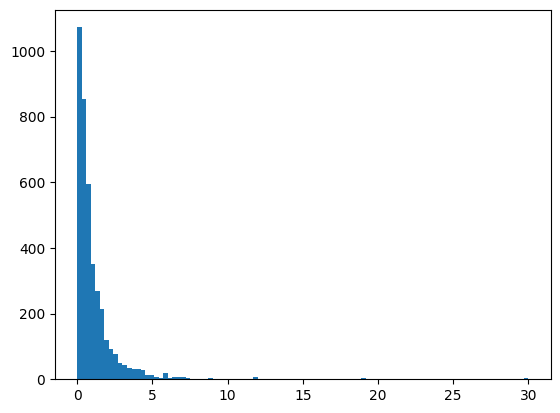

In [25]:
plt.hist(df['price_in_Cr'], bins=100)

plt.show()

In [26]:
print(df['Location'].unique())

['Chembur' 'Kurla' 'Malad West' 'Rasayani' 'Vikhroli' 'Neral' 'Mahim'
 'Fort' 'Dombivali' 'Palghar' 'Malad East' 'Vangani' 'Jogeshwari West'
 'Dahisar' 'Borivali East' 'Mulund West' 'Kharghar' 'Vasai'
 'Santacruz East' 'Ambernath East' 'Andheri West' 'Mazagaon' 'Karjat'
 'Khopoli' 'Goregaon East' 'Panvel' 'Kalyan West' 'Andheri East'
 'Dronagiri' 'Umroli' 'Virar' 'Kalyan East' 'Thane West' 'Shahapur'
 'Taloja' 'Ulwe' 'Badlapur East' 'Titwala' 'Diva' 'Kamothe' 'Bhiwandi'
 'Kandivali West' 'Powai' 'Badlapur West' 'kasaradavali thane west'
 'Dombivali East' 'Mira Road East' 'Vasai east' 'Wada' 'Dadar East'
 'Colaba' 'Sion' 'Santosh Nagar' 'Virar East' 'Agripada' 'Gorai'
 'Virar West' 'Santacruz West' 'Kalwa' 'Nala Sopara' 'Hendre Pada'
 'Vasai West' 'Mazgaon' 'Belapur' 'Borivali West' 'Nerul'
 'Kumbharkhan Pada' 'Ghatkopar West' 'Khadawali' 'Mulund East' 'Kalamboli'
 'Karanjade' 'Kanjurmarg' 'Anjurdive' 'Navade' 'Airoli' 'matunga east'
 'Vichumbe' 'Goregaon West' 'Bhangarwadi' 'Bandra Wes

### Classifying Location in broad Regions

In [27]:
North_Mumbai = ['Malad West', 'Palghar', 'Malad East', 'Jogeshwari West', 'Dahisar', 'Borivali East', 'Vasai', 'Andheri West', 'Goregaon East']
South_Mumbai = []
Central_Mumbai = ['Mahim']
Harbour_Mumbai = []
Navi_Mumbai = []